In [1]:
# Importing csv file
import pandas as pd

path = "..\dataset\SCDB_2021.csv"

raw_df = pd.read_csv(path, encoding = 'cp1252')

In [2]:
# keep only 10 optimal features - based on RFE

df = raw_df[['dateDecision', 'term', 'respondent', 'caseOrigin', 'issue', 'partyWinning']]

df.head()

,dateDecision,term,respondent,caseOrigin,issue,partyWinning
0,11/18/1946,1946,172.0,51.0,80180.0,1.0
1,11/18/1946,1946,172.0,51.0,80180.0,1.0
2,11/18/1946,1946,172.0,51.0,80180.0,1.0
3,11/18/1946,1946,172.0,51.0,80180.0,1.0
4,11/18/1946,1946,172.0,51.0,80180.0,1.0


In [3]:
df.shape

(122754, 6)

In [4]:
class_counts = df.groupby('partyWinning').size()
print(class_counts)

partyWinning
0.0    46355
1.0    76165
2.0       81
dtype: int64


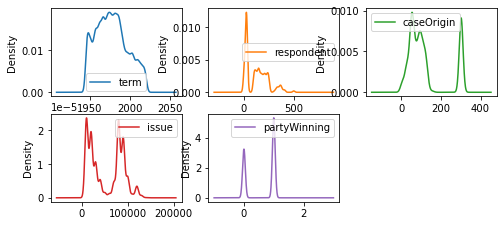

In [5]:
# Univariate Density Plots
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (8,5.5)

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False) 
pyplot.show()

In [6]:
for col in df:
    print(df[col].dtype)

object
int64
float64
float64
float64
float64


In [7]:
df[df.columns[df.isnull().any()]].isnull().sum()

respondent        72
caseOrigin      4213
issue            602
partyWinning     153
dtype: int64

In [8]:
# dropping rows where null values

df.dropna(subset=['respondent'], inplace=True)
df.dropna(subset=['caseOrigin'], inplace=True)
df.dropna(subset=['issue'], inplace=True)
df.dropna(subset=['partyWinning'], inplace=True)

df[df.columns[df.isnull().any()]].isnull().sum()

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\3883393816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['respondent'], inplace=True)
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\3883393816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['caseOrigin'], inplace=True)
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\3883393816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dro

Series([], dtype: float64)

In [9]:
# encoding date decision

from sklearn.preprocessing import LabelEncoder

df['dateDecision'] = LabelEncoder().fit_transform(df['dateDecision'])

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\2514450720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dateDecision'] = LabelEncoder().fit_transform(df['dateDecision'])


In [10]:
# converting floats to ints

df['respondent'] = df['respondent'].apply(int)
df['caseOrigin'] = df['caseOrigin'].apply(int)
df['issue'] = df['issue'].apply(int)
df['dateDecision'] = df['dateDecision'].apply(int)
df['partyWinning'] = df['partyWinning'].apply(int)

C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\4035766184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['respondent'] = df['respondent'].apply(int)
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\4035766184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['caseOrigin'] = df['caseOrigin'].apply(int)
C:\Users\Ayesha\AppData\Local\Temp\ipykernel_1788\4035766184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [11]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
import numpy

array = df.values
X = array[:,0:5]
Y = array[:, 5]

In [12]:
# split into train test sets
from collections import Counter
import keras.api._v2.keras as keras

y_onehot = keras.utils.to_categorical(Y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.33, random_state=7, stratify=y_onehot) # stratify to balance classes

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(79206, 5) (39012, 5) (79206, 3) (39012, 3)


In [13]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape)

(79206, 5)


In [14]:
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1] , 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1] , 1))

In [15]:
print(X_train.shape[0])
print(X_train.shape[1])

79206
5


In [16]:
import keras.api._v2.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from keras.layers import Conv1D, MaxPool1D, Flatten, Dropout, Dense, BatchNormalization, Activation, GaussianNoise, LSTM, Embedding, MaxPooling1D
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from keras.regularizers import l1
from keras.optimizers import SGD


In [17]:
model = Sequential()

#—Applying LSTM layer for context information extraction
LSTM_layer = LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True)
model.add(LSTM_layer)

dense_layer = Dense(125)
model.add(dense_layer)

# CNN layer
CNN_layer = Conv1D(filters=32, kernel_size=5, strides=1, padding ='same', activation ='relu')
model.add(CNN_layer)

#—MaxPooling layer
max_pool = MaxPooling1D(pool_size=2, strides=2)
model.add(max_pool)

# CNN layer
CNN_layer = Conv1D(filters=64, kernel_size=5, strides=1, padding ='same', activation ='relu')
model.add(CNN_layer)

#—MaxPooling layer
max_pool = MaxPooling1D(pool_size=2, strides=2)
model.add(max_pool)

dense_layer = Dense(1000, activation='relu')
model.add(dense_layer)

#—Flattening layer
flatten = Flatten()
model.add(flatten)

#—Prediction of court case judgement using Softmax function in dense layer
outp = Dense(3, activation="softmax")
model.add(outp)

In [18]:
model.summary(line_length=88)

#—Compilation Function
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#—Fit model
model.fit(X_train, y_train, batch_size=128, epochs=125, validation_split=0.33, verbose=2)

Model: "sequential"
________________________________________________________________________________________
 Layer (type)                          Output Shape                       Param #       
 lstm (LSTM)                           (None, 5, 64)                      16896         
                                                                                        
 dense (Dense)                         (None, 5, 125)                     8125          
                                                                                        
 conv1d (Conv1D)                       (None, 5, 32)                      20032         
                                                                                        
 max_pooling1d (MaxPooling1D)          (None, 2, 32)                      0             
                                                                                        
 conv1d_1 (Conv1D)                     (None, 2, 64)                      10304         
 

In [21]:
model.evaluate(X_test, y_test, batch_size=200)

196/196 [==============================] - 1s 7ms/step - loss: 0.1718 - accuracy: 0.9390


[0.1717691570520401, 0.9390187859535217]

In [30]:
print(X_test)

[[[0.17705439]
  [0.05405405]
  [0.6360601 ]
  [0.08305648]
  [0.46240197]]

 [[0.28265185]
  [0.14864865]
  [0.26210351]
  [0.21594684]
  [0.53821313]]

 [[0.53354506]
  [0.82432432]
  [0.40734558]
  [0.29900332]
  [0.69214209]]

 ...

 [[0.11750695]
  [0.01351351]
  [0.2754591 ]
  [0.34551495]
  [0.07796402]]

 [[0.66375546]
  [0.25675676]
  [0.16527546]
  [0.27906977]
  [0.07988621]]

 [[0.08495435]
  [0.63513514]
  [0.04340568]
  [0.19269103]
  [0.23097032]]]


In [44]:
y_pred = model.predict(X_test[0:9])

for row in y_pred:
    count = 0
    for num in row:
        print("Formatted Number with percentage for class " + str(count) +": " + "{:.2%}".format(num))
        count += 1
    print(" ")

1/1 [==============================] - 0s 19ms/step
Formatted Number with percentage for class 0: 100.00%
Formatted Number with percentage for class 1: 0.00%
Formatted Number with percentage for class 2: 0.00%
 
Formatted Number with percentage for class 0: 98.70%
Formatted Number with percentage for class 1: 1.30%
Formatted Number with percentage for class 2: 0.00%
 
Formatted Number with percentage for class 0: 85.76%
Formatted Number with percentage for class 1: 14.24%
Formatted Number with percentage for class 2: 0.00%
 
Formatted Number with percentage for class 0: 37.43%
Formatted Number with percentage for class 1: 62.57%
Formatted Number with percentage for class 2: 0.00%
 
Formatted Number with percentage for class 0: 44.01%
Formatted Number with percentage for class 1: 55.99%
Formatted Number with percentage for class 2: 0.00%
 
Formatted Number with percentage for class 0: 100.00%
Formatted Number with percentage for class 1: 0.00%
Formatted Number with percentage for class 

In [51]:
rounded_labels=numpy.argmax(y_test, axis=1)
rounded_labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
classes = numpy.argmax(predictions, axis = 1)

print(classification_report(rounded_labels, classes))

1220/1220 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     14468
           1       0.95      0.95      0.95     24520
           2       1.00      1.00      1.00        24

    accuracy                           0.94     39012
   macro avg       0.96      0.96      0.96     39012
weighted avg       0.94      0.94      0.94     39012



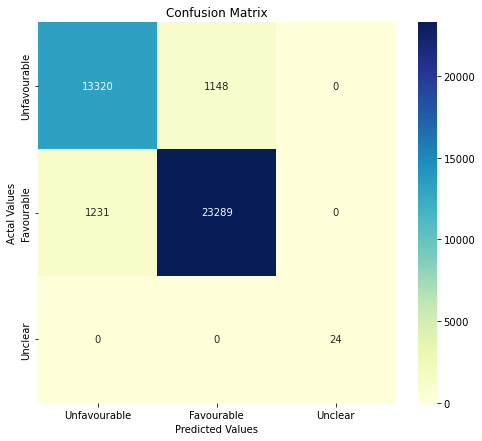

In [69]:
cm = confusion_matrix(rounded_labels, classes)

cm_df = pd.DataFrame(cm, 
    index = ['Unfavourable', 'Favourable', 'Unclear'],
    columns = ['Unfavourable', 'Favourable', 'Unclear'])

#Plotting the confusion matrix

pyplot.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap="YlGnBu")
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actal Values')
pyplot.xlabel('Predicted Values')
pyplot.show()

In [70]:
# save model

model.save('model_LSTM_CNN.h5')
print('Saved model to disk')

Saved model to disk


In [71]:
# load model
from keras.models import load_model

reconstructed_model = load_model('..\model\model_LSTM_CNN.h5')

# Let's check:
numpy.testing.assert_allclose(
    model.predict(X_test[0:1]), reconstructed_model.predict(X_test[0:1])
)

1/1 [==============================] - 0s 489ms/step
